In [19]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr 

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing



In [20]:
%matplotlib inline
rcParams['figure.figsize']= 5,4
sb.set_style('whitegrid')

In [43]:
address = "./Debugging.csv"
data = pd.read_csv(address)

data.columns=["Expertise2","Guided2","Outcome2"]


In [34]:
data_features = data.ix[:,[0,1]].values
data_features_names=['Expertise2','Guided2']
expertise = data .ix[:,0].values
y = data.ix[:,2].values
print expertise

[7 7 6 7 8 5 4 7 4 7 5 5 6 6 6 6 5 5 5 6 9 6 7 6 7 7 7]


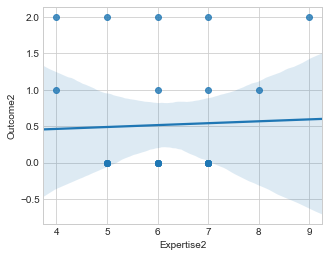

In [44]:
sb.regplot(x='Expertise2', y='Outcome2', data= data, scatter= True)


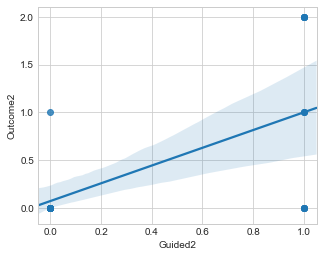

In [45]:
sb.regplot(x='Guided2', y='Outcome2', data= data, scatter= True)

In [26]:
expertise = data['Expertise2']
guided= data['Guided2']
spearmanr_coefficient, p_value = spearmanr(expertise, guided)
print 'spearmanr Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)


spearmanr Rank Correlation Coefficient -0.376


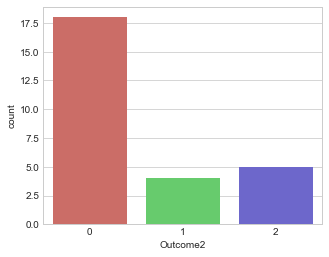

In [28]:
sb.countplot(x='Outcome2', data = data, palette ='hls')

In [29]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
Expertise2    27 non-null int64
Guided2       27 non-null int64
Outcome2      27 non-null int64
dtypes: int64(3)
memory usage: 720.0 bytes


In [36]:
X = scale(data)
logReg = LogisticRegression()
logReg.fit(X,y)
print logReg.score(X,y)

0.851851851852


In [33]:
y_pred = logReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97        18
          1       0.00      0.00      0.00         4
          2       0.62      1.00      0.77         5

avg / total       0.75      0.85      0.79        27



/Users/maryam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
